In [1]:
import numpy as np
import matplotlib.pyplot as plt

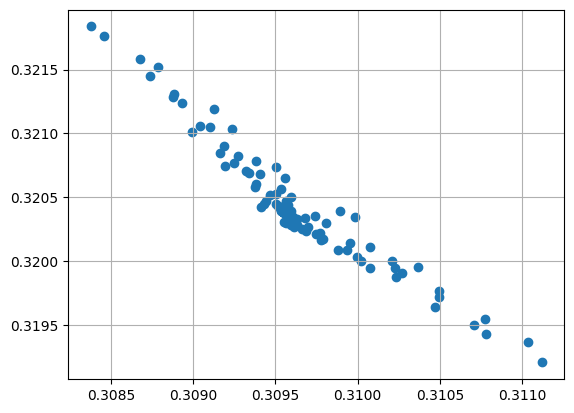

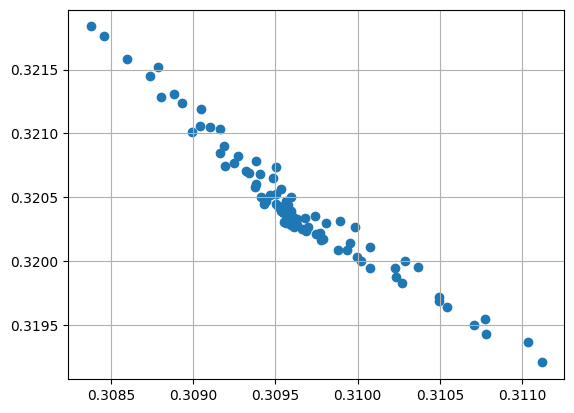

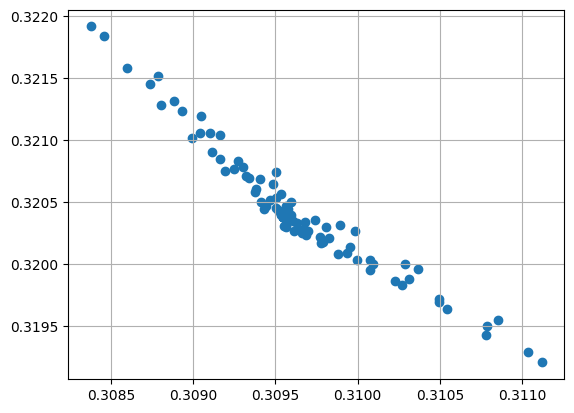

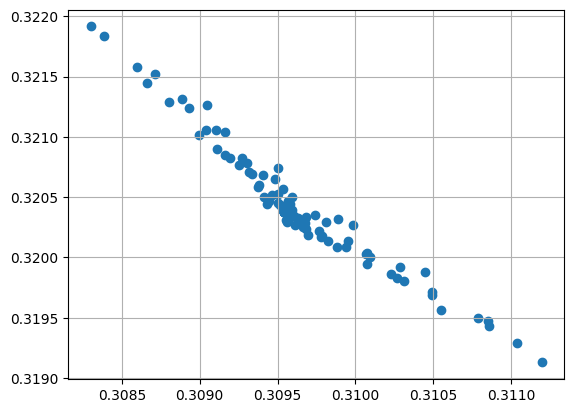

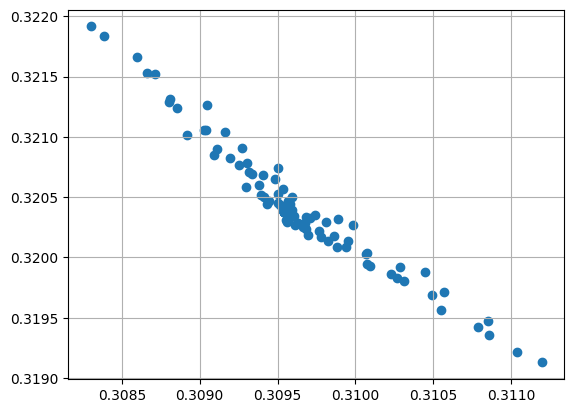

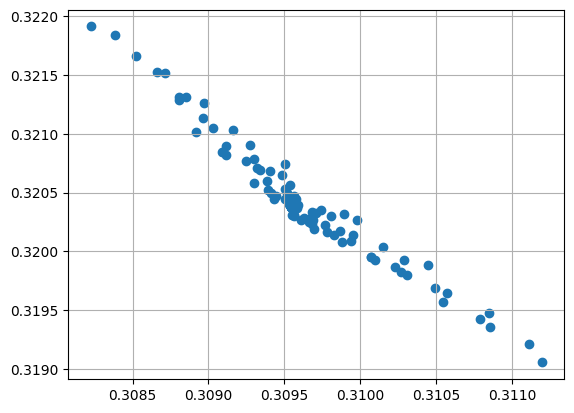

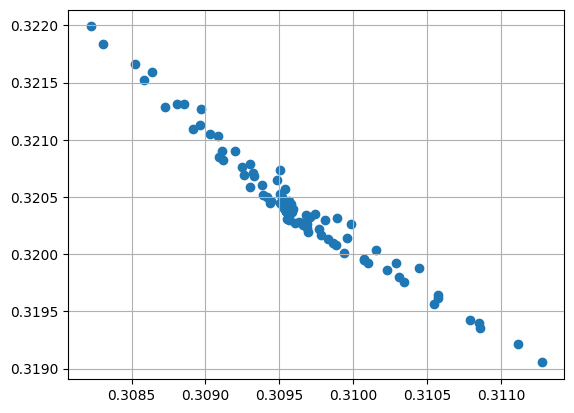

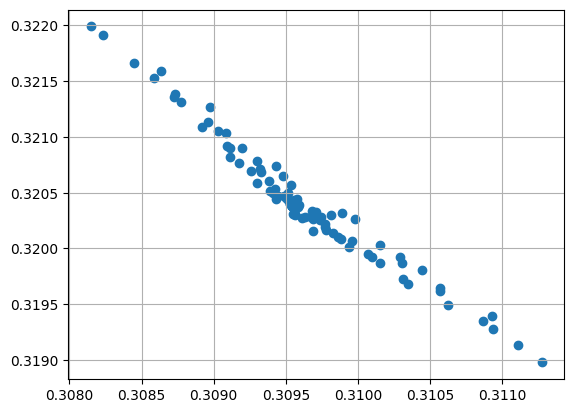

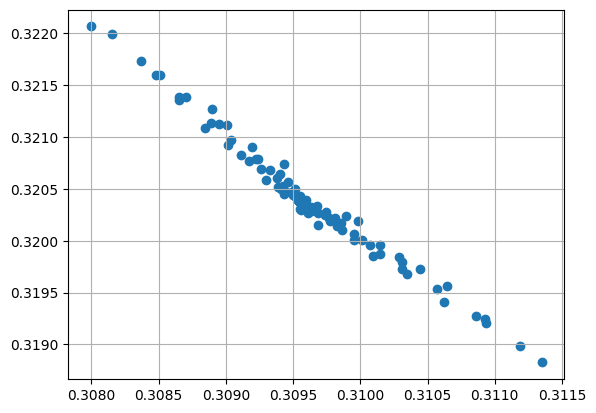

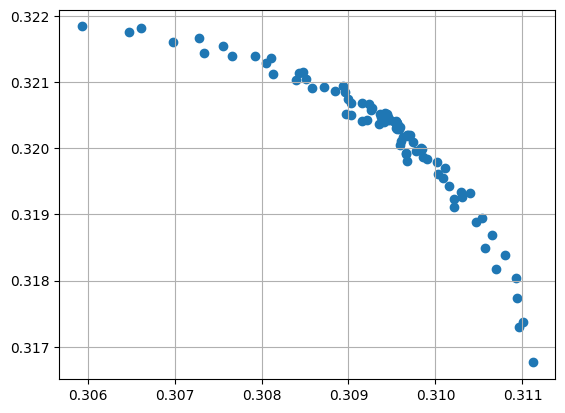

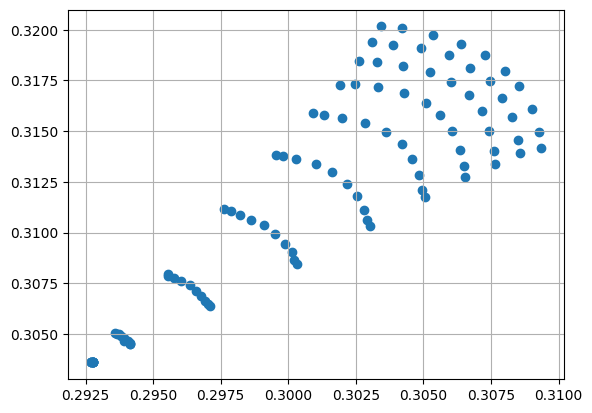

FileNotFoundError: [Errno 2] No such file or directory: '/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_alt/base_collider/xtrack_0000/footprint_step_11.npy'

In [2]:
path_footprints = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_alt/base_collider/xtrack_0000"

for i in range(100):
    path = path_footprints + "/footprint_step_" + str(i) + ".npy"
    footprint = np.load(path)
    plt.scatter(footprint[0,:], footprint[1,:], label="step " + str(i))
    plt.grid()
    plt.show()